In [1]:
import sys

if "src" not in sys.path:
    sys.path.insert(0, "src")

In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


from typing import Set, Dict, List, Tuple
from collections import defaultdict
from joinbench.benchmark_data import BenchmarkData
from joinbench.benchmark_group import BenchmarkGroup
from joinbench.benchmark_plotter import BenchmarkPlotter
from joinbench.evaluation_method_plotter import EvaluationMethodPlotter
from joinbench.benchmark_group_plotter import BenchmarkGroupPlotter

In [3]:
matplotlib.rcParams.update({
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

In [4]:
def generate_figure_path(name: str) -> str:
    return f"../report/figures/{name.replace(' ', '-')}.pgf"

In [5]:
def get_data_with_tuple_count(count: int) -> BenchmarkData:
    return BenchmarkData.infer_tuple_count_from_path(f"../data/joinbench{count}.json")

In [6]:
benchmarks: BenchmarkGroup = BenchmarkGroup.load_with_counts([10, 50, 100, 250, 500, 750, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000], path="../data/")
nf1000 = benchmarks.get_benchmark_with_count(1000)
whnf1000 = BenchmarkData.load_with_count(1000, path="../data/whnf/")

In [7]:
names = nf1000.get_report_names_in_order()
names

['join on onePercent/Product equijoin',
 'join on onePercent/Comprehension equijoin',
 'join on onePercent/Indexed equijoin',
 'join onePercent and twentyPercent/Product equijoin',
 'join onePercent and twentyPercent/Comprehension equijoin',
 'join onePercent and twentyPercent/Indexed equijoin',
 'join onePercent and fiftyPercent/Product equijoin',
 'join onePercent and fiftyPercent/Comprehension equijoin',
 'join onePercent and fiftyPercent/Indexed equijoin',
 'join even and odd/Product equijoin',
 'join even and odd/Comprehension equijoin',
 'join even and odd/Indexed equijoin']

In [8]:
group_names = nf1000.get_benchmark_group_names()
group_names

{'join even and odd',
 'join on onePercent',
 'join onePercent and fiftyPercent',
 'join onePercent and twentyPercent'}

In [9]:
group_map = nf1000.map_benchmark_groups_and_benchmark_indices()
group_map

defaultdict(list,
            {'join on onePercent': [(0, 'Product equijoin'),
              (1, 'Comprehension equijoin'),
              (2, 'Indexed equijoin')],
             'join onePercent and twentyPercent': [(3, 'Product equijoin'),
              (4, 'Comprehension equijoin'),
              (5, 'Indexed equijoin')],
             'join onePercent and fiftyPercent': [(6, 'Product equijoin'),
              (7, 'Comprehension equijoin'),
              (8, 'Indexed equijoin')],
             'join even and odd': [(9, 'Product equijoin'),
              (10, 'Comprehension equijoin'),
              (11, 'Indexed equijoin')]})

In [10]:
nf1000.get_benchmark_mean_from_index(0)

0.01725624559581199

In [11]:
whnf_plotter = BenchmarkPlotter(whnf1000)
# whnf_plotter.plot_benchmark_group_means(ax, g

In [12]:
bg = list(whnf1000.get_benchmark_group_names())[0]
bg

'join even and odd'

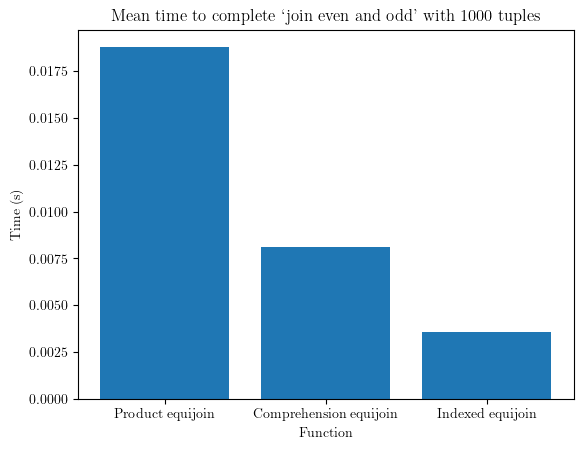

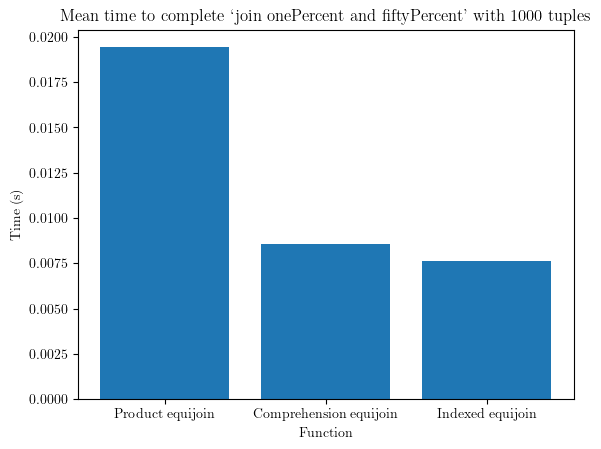

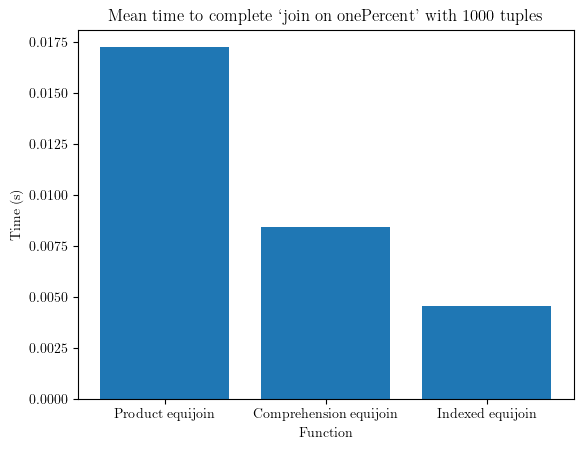

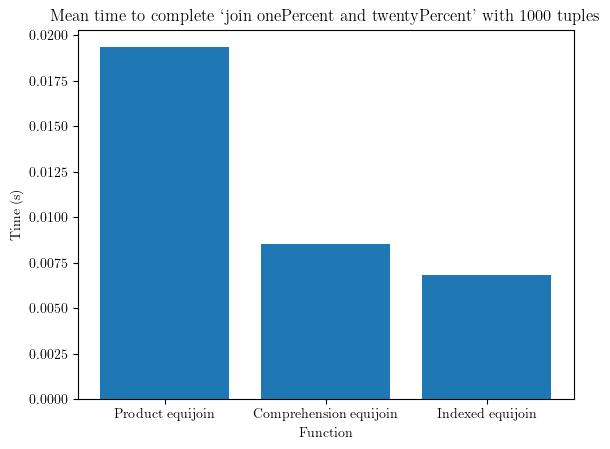

In [13]:
plotter = BenchmarkPlotter(nf1000)
for group_name in group_names:
    fig, ax = plt.subplots()
    plotter.plot_benchmark_group_means(ax, group_name)
    plt.savefig(generate_figure_path(group_name))
plt.show()

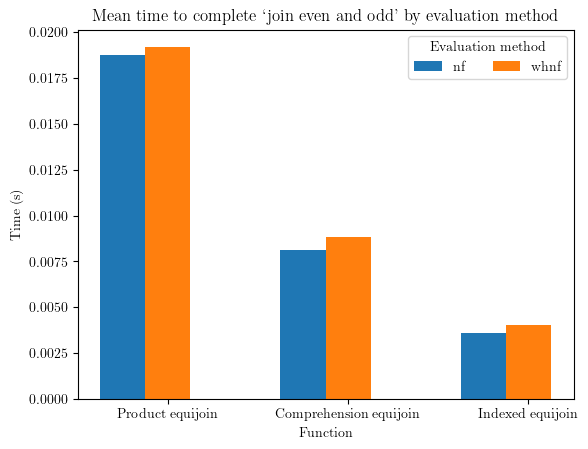

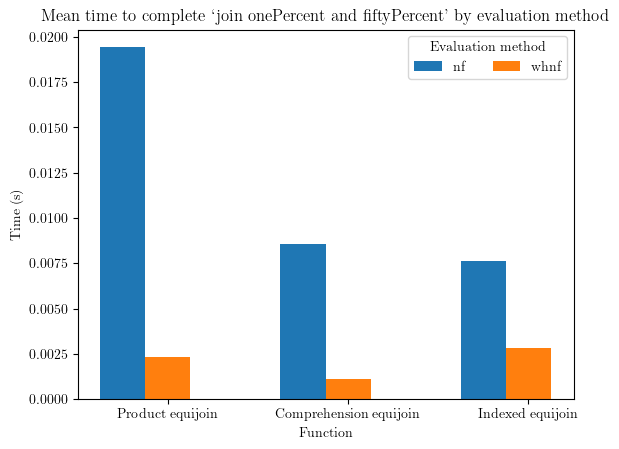

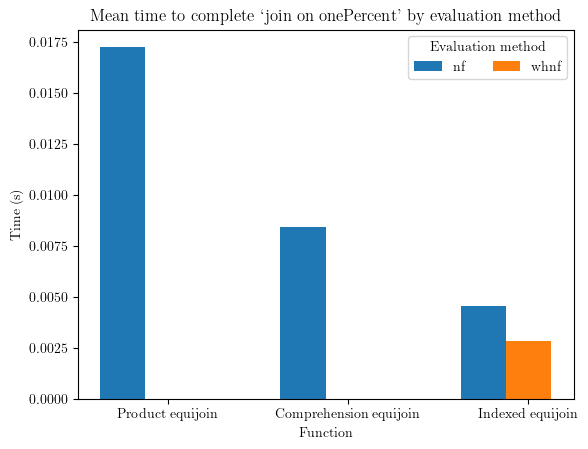

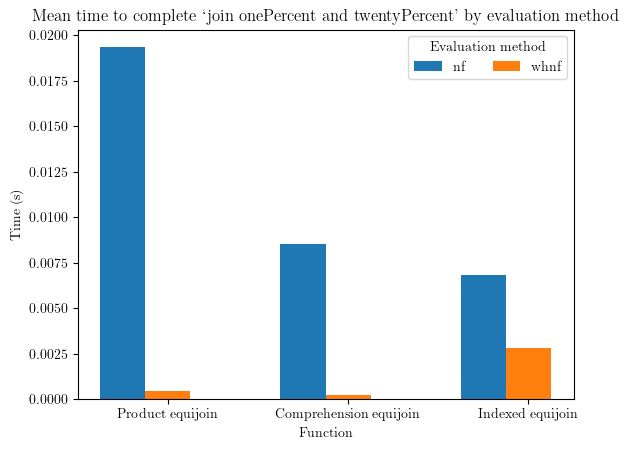

In [14]:
emp = EvaluationMethodPlotter(nf1000, whnf1000)

for group in nf1000.get_benchmark_group_names():
    fig, ax = plt.subplots()
    emp.plot_benchmark_group_means_comparison(ax, group)
    plt.show()

In [15]:
whnf1000.map_benchmark_groups_and_benchmark_indices()[bg]

[(9, 'Product equijoin'),
 (10, 'Comprehension equijoin'),
 (11, 'Indexed equijoin')]

In [16]:
print(whnf1000.get_benchmark_mean_from_index(3))
print(whnf1000.get_benchmark_mean_from_index(4))

0.0004422185773190617
0.00021004516204538082


In [17]:
group = 'join on onePercent'
colour = 'red'
xs = benchmarks.get_tuple_counts()

In [18]:
nf1000.get_function_name_list()

['Product equijoin', 'Comprehension equijoin', 'Indexed equijoin']

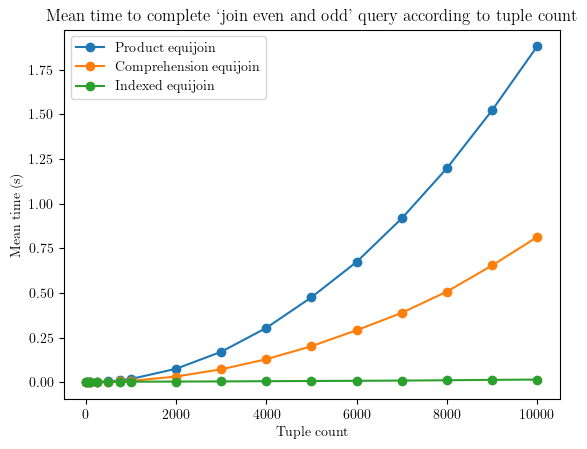

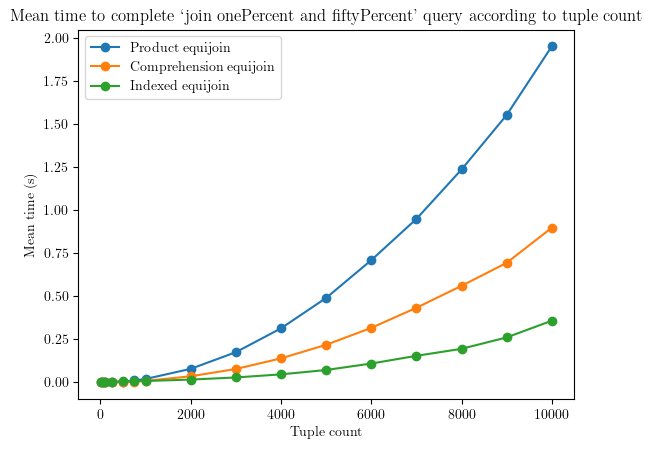

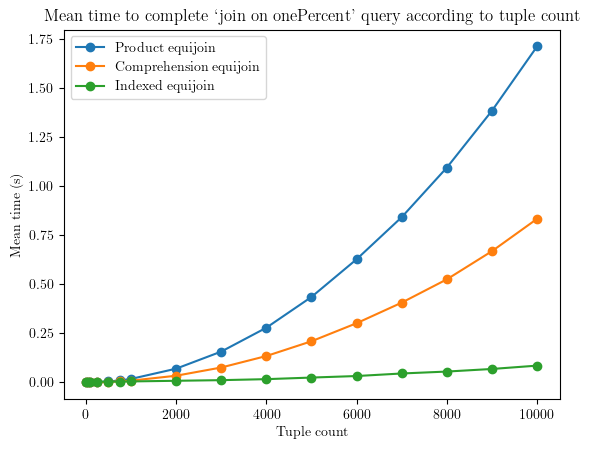

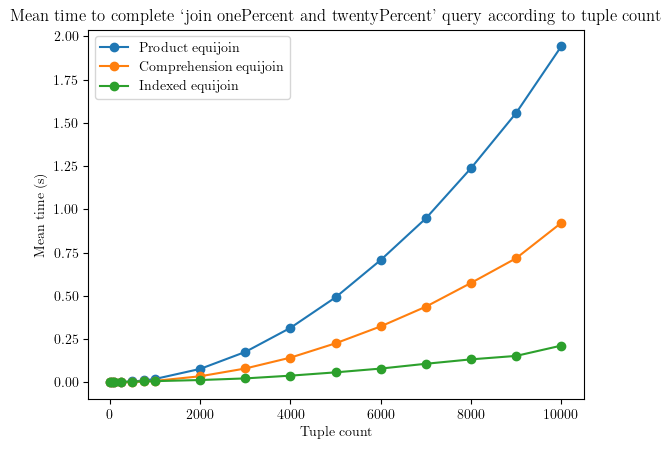

In [19]:
group_plotter: BenchmarkGroupPlotter = BenchmarkGroupPlotter(benchmarks)

groups = nf1000.get_benchmark_group_names()

for group in groups:
    fig, ax = plt.subplots()
    group_plotter.plot_mean_time_of_group_by_tuple_count(ax, group)
    plt.savefig(generate_figure_path(f"mean time for {group} by tuple count"))